In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("heart.csv")

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
#unique values
for i in list(df.columns):
    print("{} -- {}".format(i,df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trestbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalach -- 91
exang -- 2
oldpeak -- 40
slope -- 3
ca -- 5
thal -- 4
target -- 2


In [28]:
#categorical feature anlaysis
categorical_list = ["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]

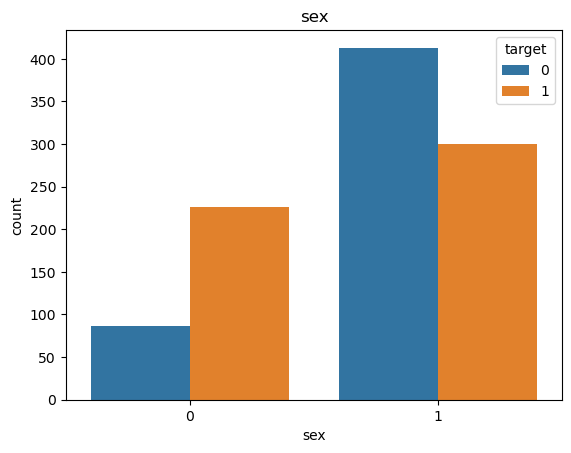

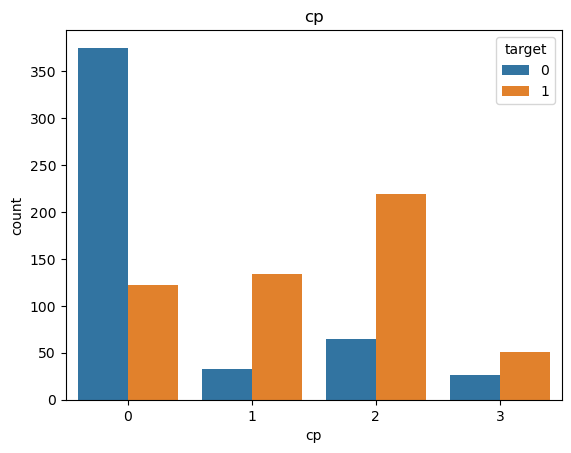

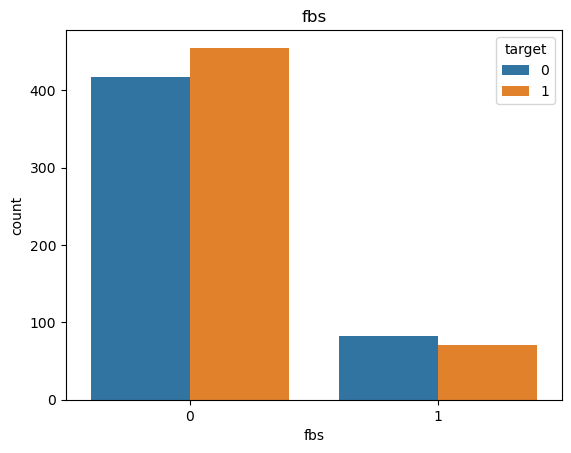

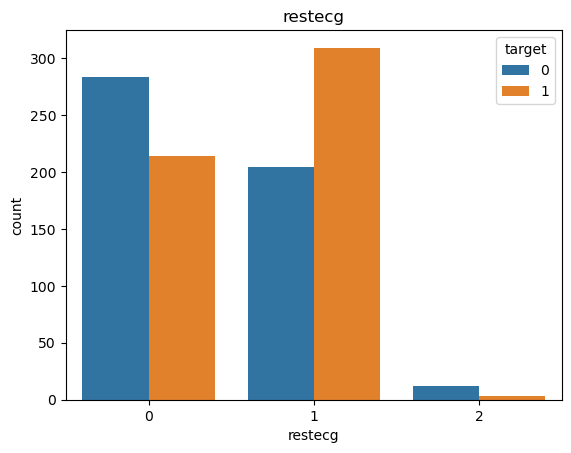

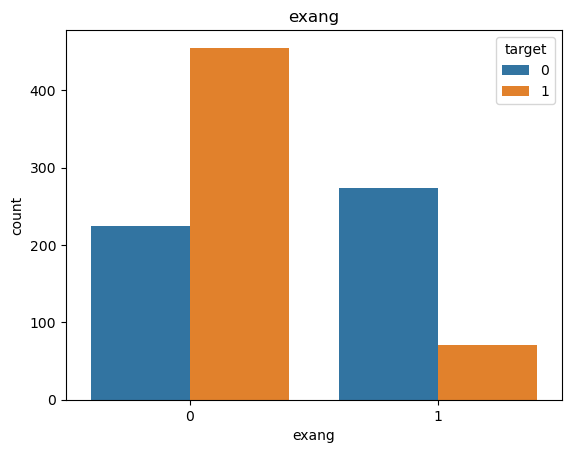

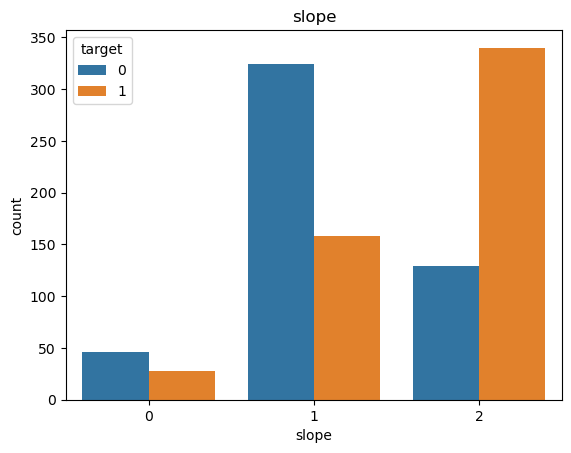

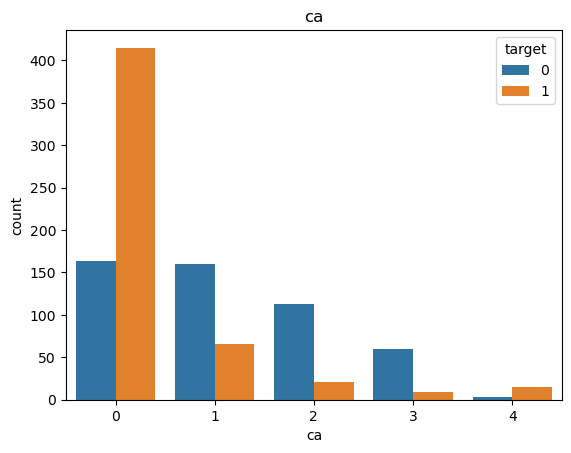

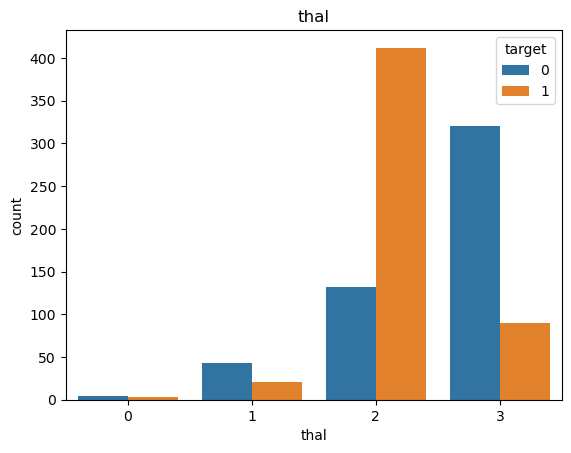

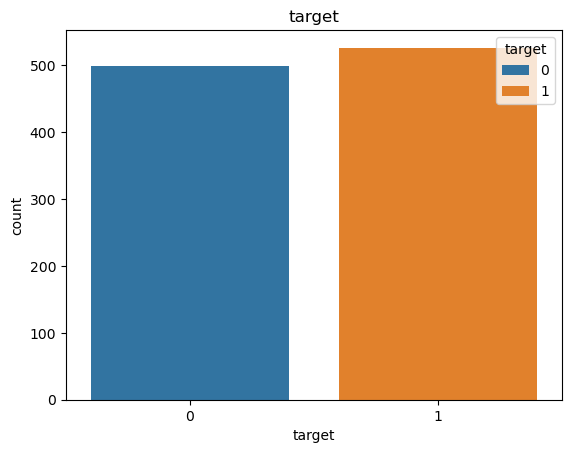

In [32]:
df_categoric = df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i,data = df_categoric,hue = "target")
    plt.title(i)

In [34]:
# numeric feature analysis
numeric_list = ["age","trestbps","chol","thalach","oldpeak","target"]

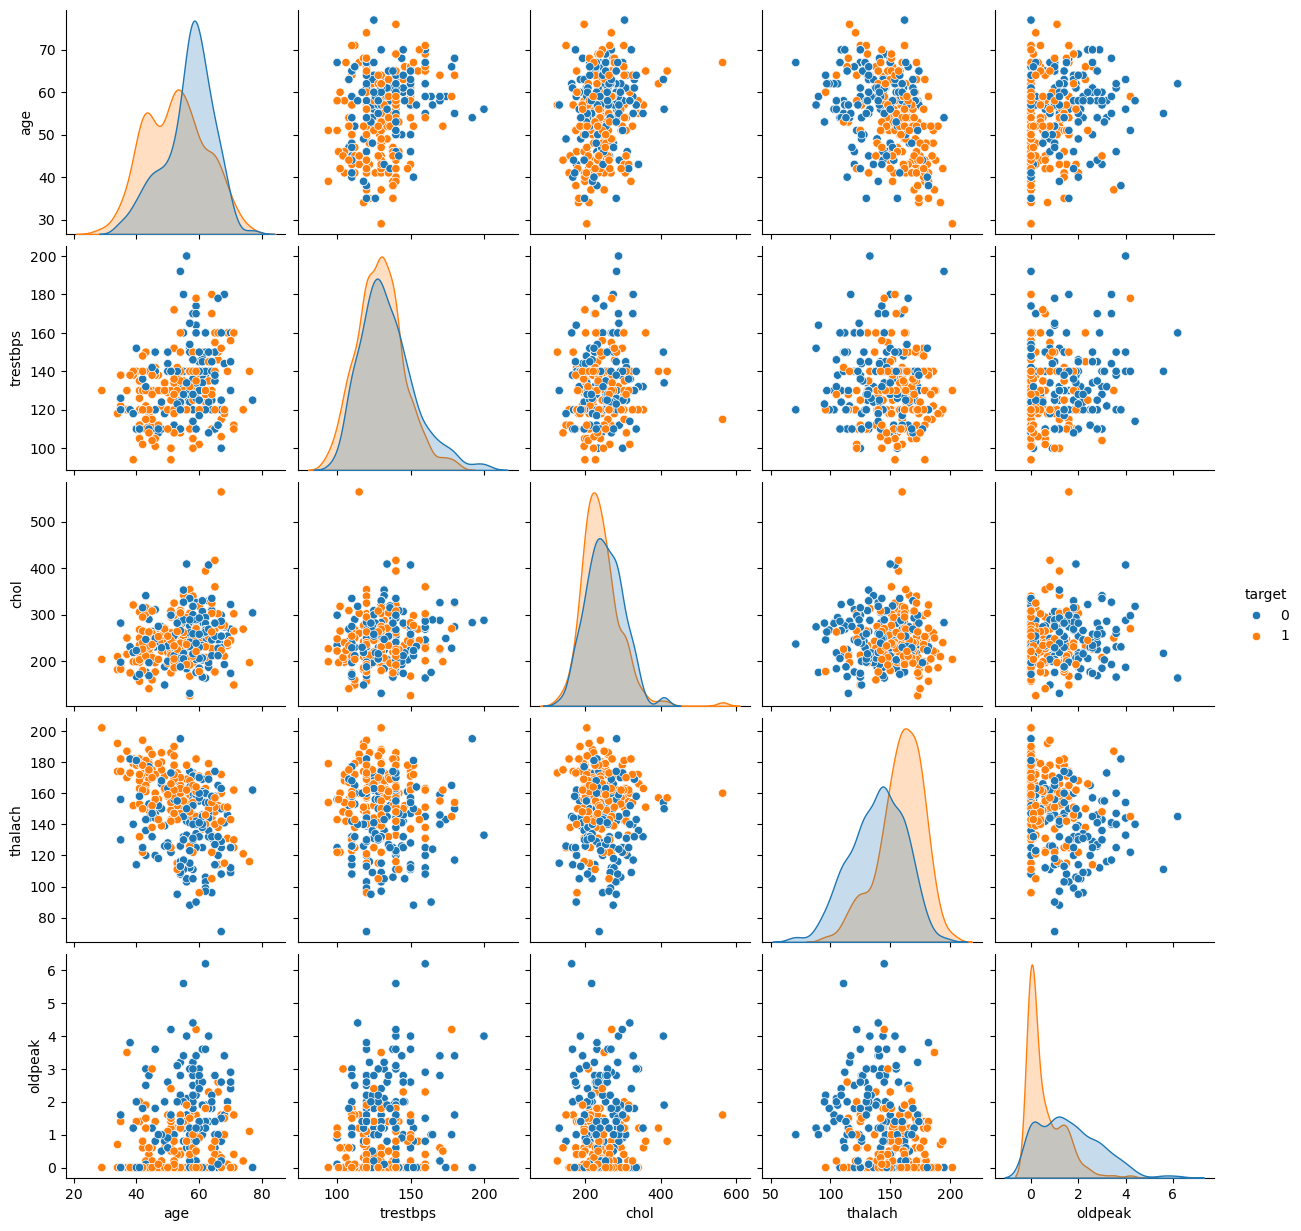

In [38]:
df_numeric = df.loc[:,numeric_list]
sns.pairplot(df_numeric,hue = "target",diag_kind = "kde")
plt.show()

In [42]:
# standardization
scaler = StandardScaler()
scaler

StandardScaler()

In [44]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])

In [46]:
scaled_array

array([[-0.26843658, -0.37763552, -0.65933209,  0.82132052, -0.06088839],
       [-0.15815703,  0.4791073 , -0.83386117,  0.2559679 ,  1.72713707],
       [ 1.71659547,  0.76468824, -1.39623266, -1.04869198,  1.30141672],
       ...,
       [-0.81983438, -1.23437834,  0.56237149, -1.35311262, -0.06088839],
       [-0.4889957 , -1.23437834,  0.15513696,  0.42992256, -0.91232909],
       [-0.04787747, -0.66321646, -1.12474297, -1.57055593,  0.27968789]])

In [48]:
#Boxplot analysis

In [52]:
df_dummy = pd.DataFrame(scaled_array,columns= numeric_list[:-1])
df_dummy.head()

,age,trestbps,chol,thalach,oldpeak
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888
1,-0.158157,0.479107,-0.833861,0.255968,1.727137
2,1.716595,0.764688,-1.396233,-1.048692,1.301417
3,0.724079,0.936037,-0.833861,0.516900,-0.912329
4,0.834359,0.364875,0.930822,-1.874977,0.705408


In [58]:
df_dummy = pd.concat([df_dummy, df.loc[:,"target"]],axis = 1)
df_dummy.head()

,age,trestbps,chol,thalach,oldpeak,target
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0


In [74]:
data_melted = pd.melt(df_dummy,id_vars = "target",var_name = "features", value_name = "value")
data_melted.head(20)

,target,features,value
0,0,age,-0.268437
1,0,age,-0.158157
2,0,age,1.716595
3,0,age,0.724079
4,0,age,0.834359
5,1,age,0.393241
6,0,age,0.393241
7,0,age,0.062402
8,0,age,-0.930114
9,0,age,-0.047877


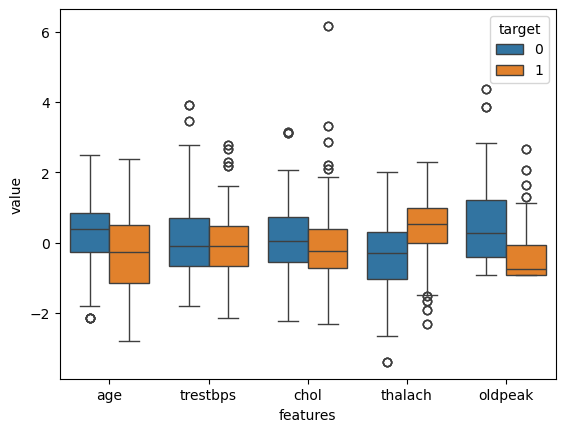

In [64]:
plt.figure()
sns.boxplot(x = "features",y = "value", hue = "target", data = data_melted)
plt.show()

In [66]:
# swarm plot analysis

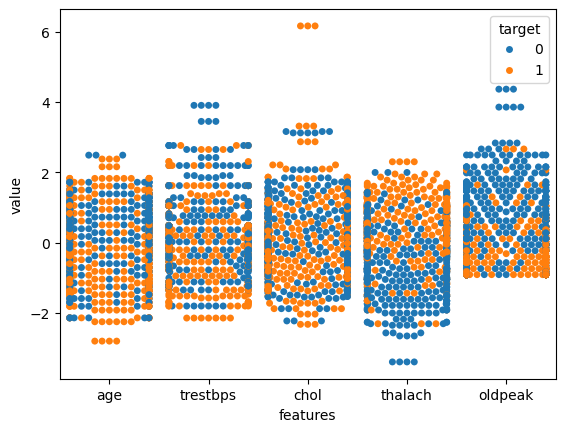

In [70]:
plt.figure()
sns.swarmplot(x = "features",y = "value", hue = "target", data = data_melted)
plt.show()

In [71]:
#cat plot analysis

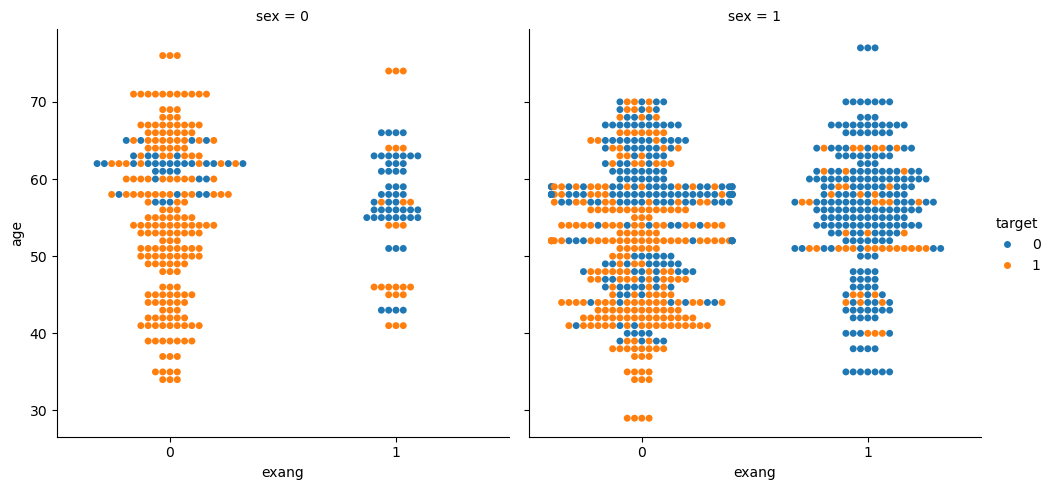

In [72]:
sns.catplot(x = "exang",y = "age", hue = "target", col = "sex", kind = "swarm",data = df)
plt.show()

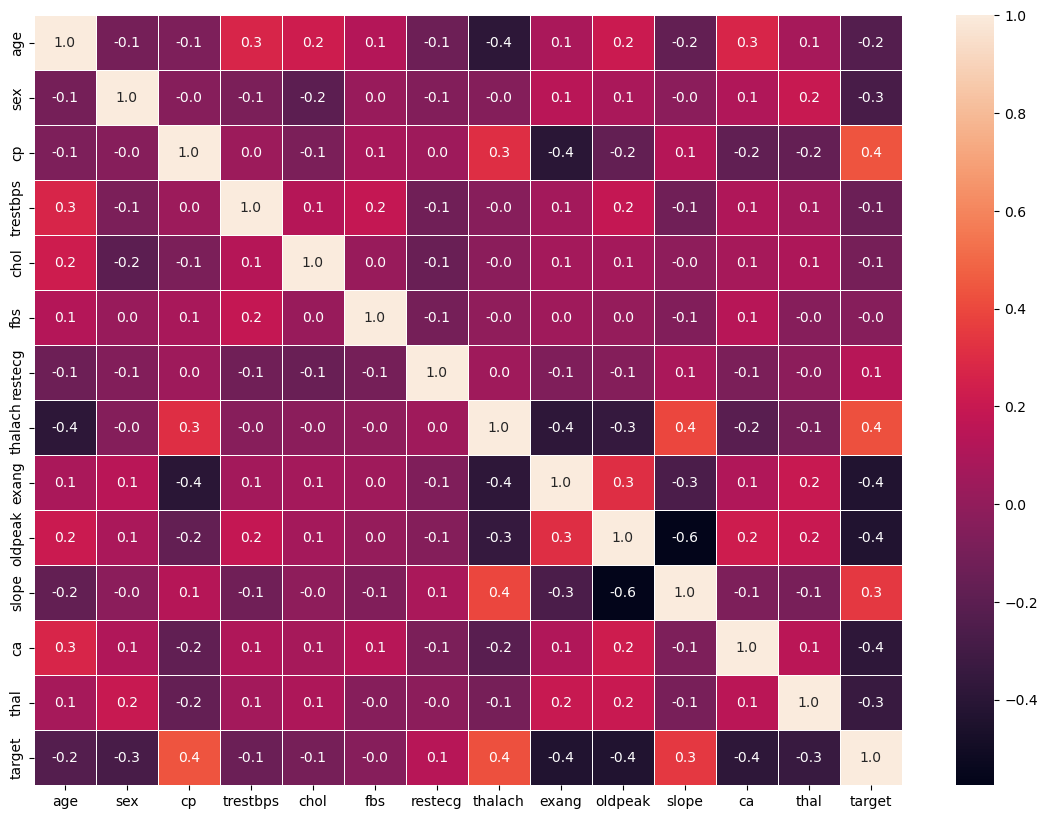

In [81]:
#correlation analysis
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [83]:
# outlier detection

In [87]:
numeric_list = ["age","trestbps","chol","thalach","oldpeak"]
df_numeric = df.loc[:,numeric_list]
df_numeric.head()

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9


In [91]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [93]:
# outlier detection part
for i in numeric_list:
    # IQR
    Q1 = np.percentile(df.loc[:,i],25)
    Q3 = np.percentile(df.loc[:,i],75)

    IQR = Q3 - Q1
    print("Old shape:",df.loc[:,i].shape)

    # upper bound
    upper = np.where(df.loc[:,i] >= (Q3 + 2.5*IQR))

    # lower bound
    lower = np.where(df.loc[:,i] <= (Q1 - 2.5*IQR))

    print("{} -- {}".format(upper,lower))

    try:
        df.drop(upper[0], inplace = True)
    except: print("Keyerror: {} not found in axis".format(upper[0]))

    try:
        df.drop(lower[0], inplace = True)
    except: print("Keyerror: {} not found in axis".format(lower[0]))

    print("New shape:",df.shape)

Old shape: (1025,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape: (1025, 14)
Old shape: (1025,)
(array([151, 175, 246, 294, 326, 508, 688], dtype=int64),) -- (array([], dtype=int64),)
New shape: (1018, 14)
Old shape: (1018,)
(array([157, 190, 459], dtype=int64),) -- (array([], dtype=int64),)
New shape: (1015, 14)
Old shape: (1015,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape: (1015, 14)
Old shape: (1015,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape: (1015, 14)


In [95]:
# modelin

In [97]:
df1 = df.copy()

In [103]:
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,140,203,155,3.1,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,138,294,106,1.9,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [105]:
X = df1.drop(["target"], axis = 1)
y = df1[["target"]]

In [107]:
# scaling
scaler = StandardScaler()
scaler

StandardScaler()

In [109]:
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268782,-0.369971,-0.651607,0.830596,1.0,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.158909,0.527117,-0.825655,0.262941,3.1,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
2,1.708926,0.826146,-1.386476,-1.047032,2.6,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.720072,1.005564,-0.825655,0.524936,0.0,True,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.829945,0.407505,0.934161,-1.876682,1.9,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False


In [111]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state = 3)

In [119]:
# logistic regression
logreg = LogisticRegression()
logreg

LogisticRegression()

In [121]:
# fitting - training
logreg.fit(X_train, y_train)

LogisticRegression()

In [123]:
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[0.57674445, 0.42325555],
       [0.92594964, 0.07405036],
       [0.55498705, 0.44501295],
       [0.23085046, 0.76914954],
       [0.02302206, 0.97697794],
       [0.01941558, 0.98058442],
       [0.14567281, 0.85432719],
       [0.04816826, 0.95183174],
       [0.05769231, 0.94230769],
       [0.88311603, 0.11688397],
       [0.02490352, 0.97509648],
       [0.1452143 , 0.8547857 ],
       [0.95611969, 0.04388031],
       [0.25518306, 0.74481694],
       [0.93403122, 0.06596878],
       [0.30497993, 0.69502007],
       [0.08469728, 0.91530272],
       [0.81654945, 0.18345055],
       [0.03466911, 0.96533089],
       [0.98363999, 0.01636001],
       [0.04290599, 0.95709401],
       [0.76339262, 0.23660738],
       [0.80920337, 0.19079663],
       [0.96029591, 0.03970409],
       [0.98139585, 0.01860415],
       [0.01215865, 0.98784135],
       [0.78908555, 0.21091445],
       [0.12913835, 0.87086165],
       [0.37893125, 0.62106875],
       [0.5195438 , 0.4804562 ],
       [0.

In [125]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [127]:
print("Test accuracy: {}".format(accuracy_score(y_pred,y_test)))

Test accuracy: 0.8333333333333334


In [129]:
#roc curve
# false positive rate, true positive rate
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])

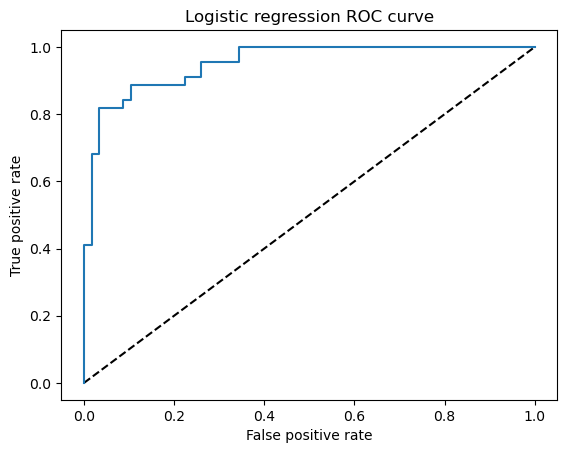

In [131]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label = "Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic regression ROC curve")
plt.show()

In [133]:
# logistig regression hyperparameter tuning
lr = LogisticRegression()
lr

LogisticRegression()

In [135]:
penalty = ["l1","l2"]
parameters = {"penalty":penalty}

In [137]:
lr_searcher = GridSearchCV(lr, parameters)

In [139]:
lr_searcher.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [141]:
print("Best parameters:",lr_searcher.best_params_)

Best parameters: {'penalty': 'l2'}


In [145]:
y_pred = lr_searcher.predict(X_test)

In [147]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.8333333333333334
